### Firstly, we are going to texture a 3D mesh using mayavi lib

In [1]:
from osgeo import gdal
from tvtk.api import tvtk
from mayavi import mlab
import Image

In [2]:
im1 = Image.open("texture6.jpg")

In [3]:
im2 = im1.rotate(90)
im2.save("tmp/texture6.jpg")

In [4]:
bmp1 = tvtk.JPEGReader(file_name="tmp/texture6.jpg")

In [5]:
my_texture=tvtk.Texture()
my_texture.interpolate=0

In [6]:
# my_texture.set_input(0,bmp1.get_output())
#tvtk.configure_input(my_texture, bmp1)
my_texture=tvtk.Texture(input_connection=bmp1.output_port, interpolate=0)

In [7]:
surf=mlab.pipeline.surface(mlab.pipeline.open("PLY/ASR.ply"))

In [8]:
surf.actor.enable_texture = True
surf.actor.tcoord_generator_mode = 'plane'
surf.actor.actor.texture = my_texture
#mlab.show()
mlab.show()

### we are going to smaple images' pixels from images

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [10]:
img=mpimg.imread('tissue.jpg')

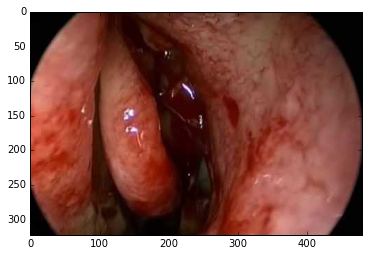

In [11]:
plt.imshow(img)
plt.show()

In [12]:
img.shape

(323L, 480L, 3L)

In [13]:
import random
sample_array=[]
r=150
center=[img.shape[0]/2,img.shape[1]/2]
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if (i-center[0])**2+(j-center[1])**2<=100**2:
            sample_array.append(list(img[i,j,:]))
            
#array=np.array(sample_array)
length=len(sample_array)

constructed_image=[]
for i in range(img.shape[0]):
    temp_array=[]
    for j in range(img.shape[1]):
        randnum=random.randint(0,length-1)
        temp_array.append(sample_array[randnum])
    constructed_image.append(temp_array)
constructed_image=np.array(constructed_image)

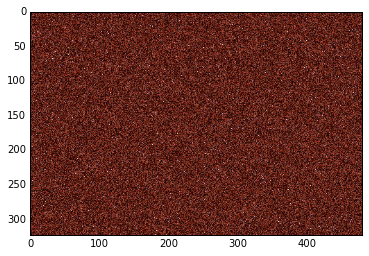

In [14]:
plt.imshow(constructed_image)
plt.show()

In [15]:
import scipy.misc
scipy.misc.imsave('sampled_texture.jpg', constructed_image)

### Now,we are going to use sampled image to texture 3D-mesh 

In [16]:
from osgeo import gdal
from tvtk.api import tvtk
from mayavi import mlab
import Image

im1 = Image.open("sampled_texture.jpg")
im2 = im1.rotate(90)
im2.save("tmp/sampled_texture.jpg")
bmp1 = tvtk.JPEGReader(file_name="tmp/sampled_texture.jpg")

my_texture=tvtk.Texture()
my_texture.interpolate=0
my_texture=tvtk.Texture(input_connection=bmp1.output_port, interpolate=0)

In [ ]:
surf=mlab.pipeline.surface(mlab.pipeline.open("PLY/target.ply"))
surf.actor.enable_texture = True
surf.actor.tcoord_generator_mode = 'plane'
surf.actor.actor.texture = my_texture
#mlab.show()
mlab.show()